# Prediction on borrower that will pay

In [2]:
# We import all the needed libraries
%matplotlib inline
import numpy as np #Nummerical python library for linear algebra
import pandas as pd #Dataframe Procesing library
import matplotlib.pyplot as plt #Ploting Library
import seaborn as sns # Visualization library complimenting matplotlib

In [7]:
#Read the data with the pandas library
loan=pd.read_csv(r'C:/Users/LBAN/Desktop/senti_analysis/loan_data.csv')

In [8]:
#This prints first five rows of the data set 
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
#We have 9578 row and 14 columns
loan.shape

(9578, 14)

In [15]:
# This gives the info of all the column 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [16]:
#View the list for null values  
loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [17]:
#Get the descriptive statistics of the dataset
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Positive examples = 1533
Negative examples = 8045
Proportion of positive to negative examples = 19.06%


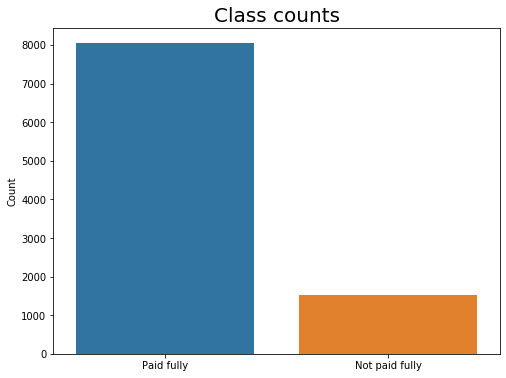

In [25]:
#Get number of positve and negative examples
pos = loan[loan["not.fully.paid"] == 1].shape[0]
neg = loan[loan["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(loan["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

Text(0.5, 0, 'Credit Score of the Borrower')

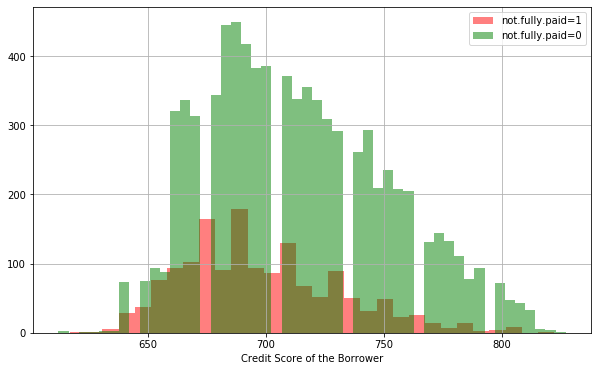

In [30]:
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='r',bins=30,label='not.fully.paid=1')
loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='g',bins=50,label='not.fully.paid=0')
plt.legend()
plt.xlabel('Credit Score of the Borrower')

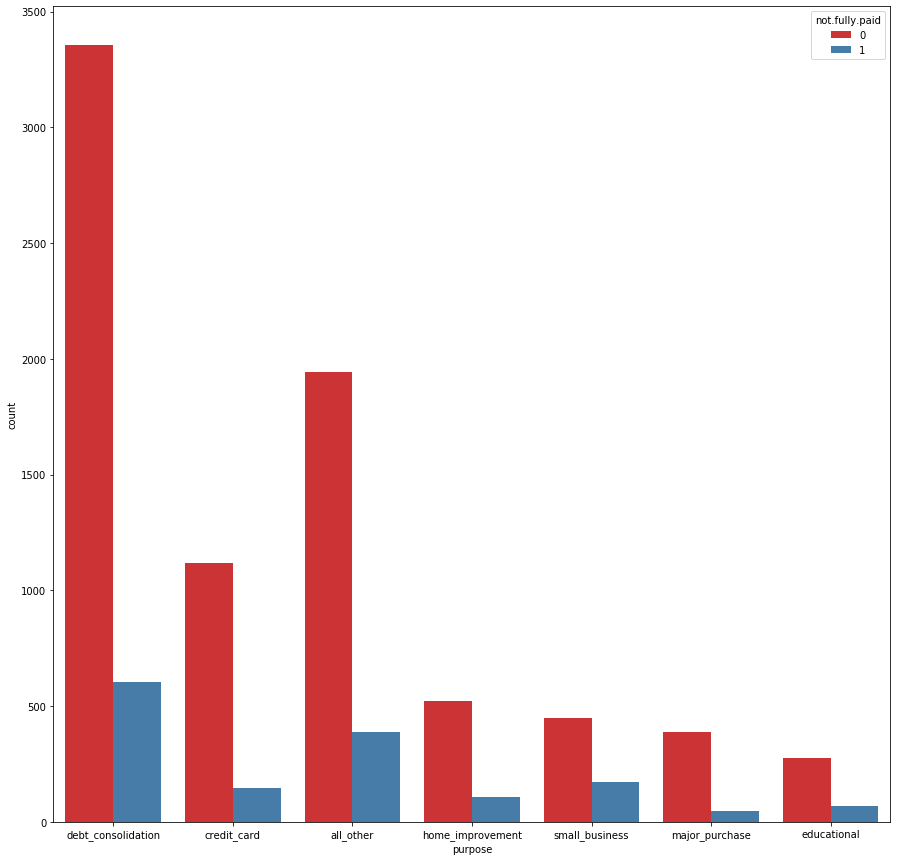

In [31]:
plt.figure(figsize=(15,15))
sns.countplot(x='purpose',hue='not.fully.paid',palette='Set1',data=loan)

In [43]:
#One of the most important features is the purpose of the loan.
# Eventually the purpose column is a categorical data
# Hence, we have to convert to numerical data
purp_loan=['purpose']
#used duummy varible to convert categorical data to numerical data
loans=pd.get_dummies(loan,columns=purp_loan,drop_first=False)
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [44]:
loan.shape

(9578, 14)

In [45]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [49]:
x=loans.drop(['not.fully.paid'],axis=1)
y=loans['not.fully.paid']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [52]:
from sklearn import svm
clf=svm.SVC(kernel='rbf',gamma='auto',C=1.0)
clf.fit(X_train,y_train)
clf.fit(X_test,y_test)
trainscore=clf.score(X_train,y_train)
print('trainscore',trainscore)
testscore=clf.score(X_test,y_test)
print('testscore',testscore)
svcpredict=clf.predict(X_test)
print('svc predict',svcpredict)

trainscore 0.8398997633300849
testscore 1.0
svc predict [0 0 1 ... 0 0 0]


In [60]:
from sklearn.metrics import classification_report,confusion_matrix
cls =classification_report(y_test,svcpredict)

print(cls)
def pretty_confusion_matrix(y_test,svcpredict, labels=["False", "True"]):
    cm = confusion_matrix(y_test,svcpredict)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

pretty_confusion_matrix(y_test,svcpredict, ['Not Pay', 'Pay'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2012
           1       1.00      1.00      1.00       383

    accuracy                           1.00      2395
   macro avg       1.00      1.00      1.00      2395
weighted avg       1.00      1.00      1.00      2395



,Predicted Not Pay,Predicted Pay
Not Pay,2012,0
Pay,0,383


# From the prediction, we can see that 84percent will not pay back the loan, hence it is advisable not to release much loan 